In [1]:
import numpy as np
import scipy as sc
import csv
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import jaccard_score

In [2]:
users = [0,107, 348, 414, 686, 698, 1684, 1912, 3437, 3980]
nodes={}

In [3]:
def get_features(user):
    with open("facebook/" + str(user) + ".feat", "r") as file:
        features={}
        for line in file:
            splt = line.split(" ")
            features[int(splt[0])] = np.array(splt[1:-1]).astype(bool)
        return features

In [4]:
circle_features = {}
for user in users:
    circle_features[user] = get_features(user)

In [5]:
def get_laplacians(users):
    
    laplacians={}
    for user in users:
        G= nx.Graph()
        with open("facebook/" + str(user) + ".edges", "r") as file:
            data = np.loadtxt(file, skiprows=0, dtype=int)
            #print(data)
            
            #for i,j in data:
            #    G.add_edge(i,j)
            G.add_edges_from(data)
            
            #adjacency = data
            #friends = data.flatten()
            #degree = np.bincount(friends)

            #print(adjacency)
            #print(degree[236])
            if G.number_of_edges()>0:
                nodes[user] = list(G.nodes)
                laplacians[user] = nx.laplacian_matrix(G)
    return laplacians
            

In [6]:
def get_laplacians_weighted(users):
    
    laplacians={}
    for user in users:
        G= nx.Graph()
        with open("facebook/" + str(user) + ".edges", "r") as file:
            data = np.loadtxt(file, skiprows=0, dtype=int)
            #print(data)
            weights=[]
            for i,j in data:
                G.add_edge(i,j,weight=jaccard_score(circle_features[user][i],circle_features[user][j]))
            
            #G.add_edges_from(data)
            
            #adjacency = data
            #friends = data.flatten()
            #degree = np.bincount(friends)

            #print(adjacency)
            #print(degree[236])
            if G.number_of_edges()>0:
                nodes[user] = list(G.nodes)
                laplacians[user] = nx.laplacian_matrix(G)
    return laplacians
            

In [7]:
def eigen_decomposition(matrix):
    return np.linalg.eigh(matrix)


In [8]:
lapl = get_laplacians(users)                                          #regular unweighted version
lapl_w = get_laplacians_weighted(users)                                  #weighted version for 1.5
eigen_d = {k:eigen_decomposition(lapl[k].A) for k in lapl}
eigen_d_w = {k:eigen_decomposition(lapl[k].A) for k in lapl_w}
#for l in lapl:
#    print(eigen_decomposition(lapl[l].A))

In [9]:
#eigen_d


In [10]:
def plot_gaps(index,gaps):
    #plt.figure(4,figsize=(5,5))
    
    #Y = np.array(gaps)
    
    plt.plot(gaps)

    plt.xlabel("x")
    plt.ylabel("eigengap")
    plt.title("Gaps for circles of " + str(index))

    plt.show()

unweighted


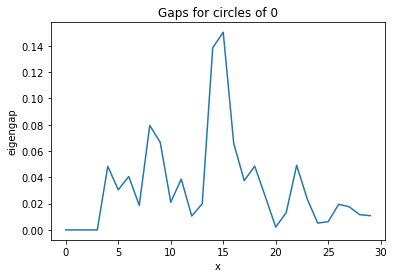

with weighted edges


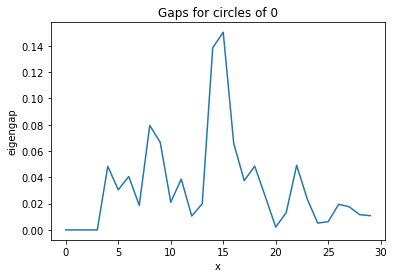

unweighted


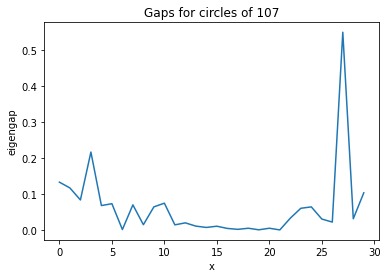

with weighted edges


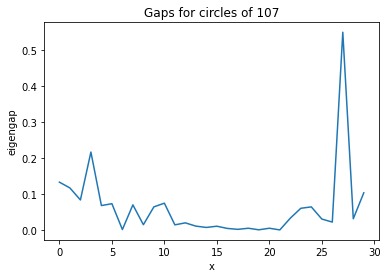

unweighted


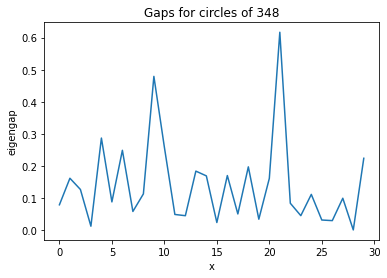

with weighted edges


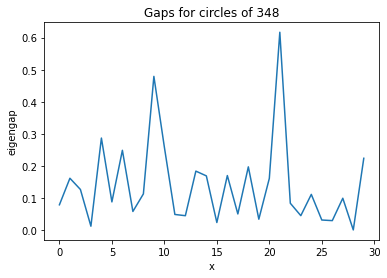

unweighted


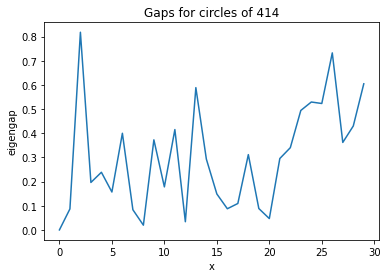

with weighted edges


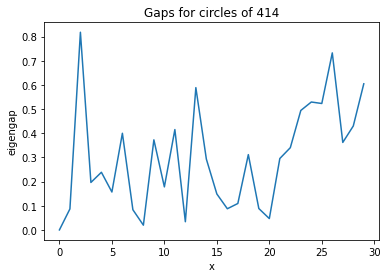

unweighted


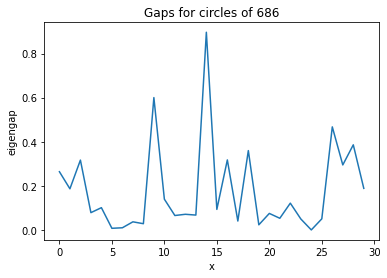

with weighted edges


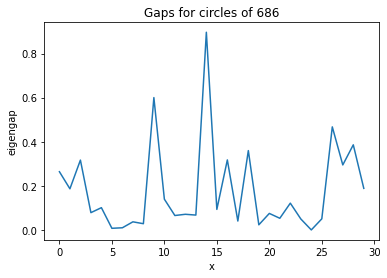

unweighted


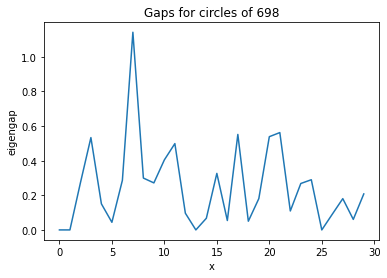

with weighted edges


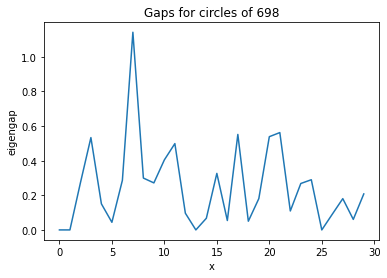

unweighted


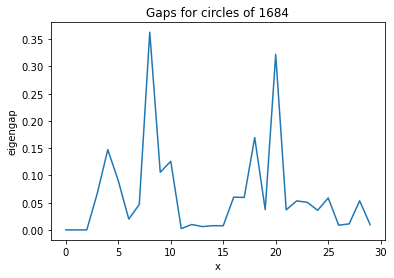

with weighted edges


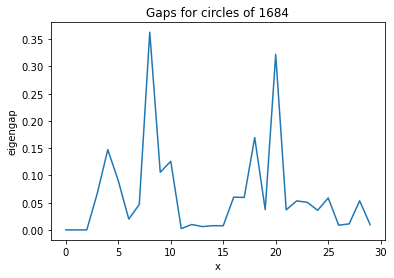

unweighted


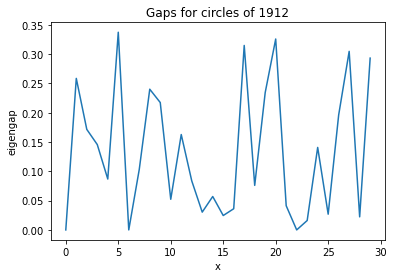

with weighted edges


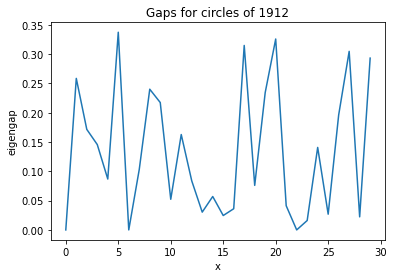

unweighted


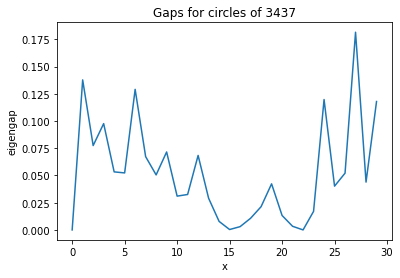

with weighted edges


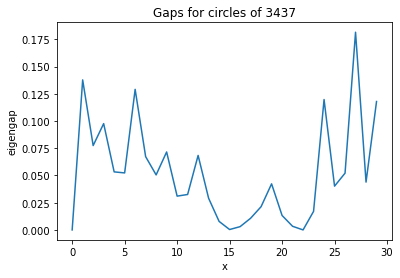

unweighted


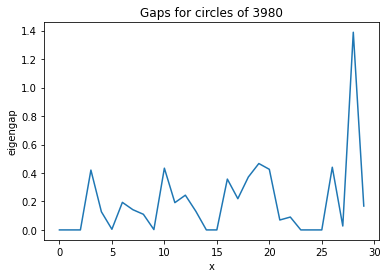

with weighted edges


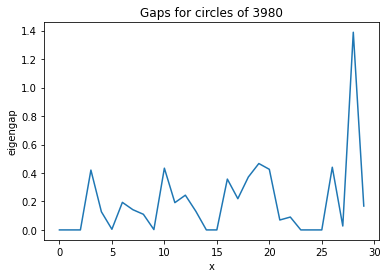

In [16]:
for user in users:
    test_values = eigen_d[user][0]
    #test_values
    gaps = np.diff(test_values)
    print("unweighted")
    plot_gaps(user, gaps[:30])
    print("with weighted edges")
    test_values_w = eigen_d_w[user][0]
    #test_values
    gaps_w = np.diff(test_values_w)
    #print("unweighted")
    plot_gaps(user, gaps_w[:30])

In [17]:
peaks = [15,27, 9, 3,14, 7,8, 27, 27, 28]

In [18]:
peaks_w=[13,3,10,24,21,11,21,7,23,21]

In [19]:
def get_golden_standard(user):
    with open("facebook/" + user + ".circles", "r") as file:
        labels = {}
       
        for line in file:
            line = line.replace("\n", " ")
            splt = line.split("\t")
            lst = []
            circle_id = int(splt[0].replace("circle",""))
            for id in splt[1:]:
                if int(id) not in labels:
                    labels[int(id)]=[]
                labels[int(id)].append(circle_id)
                
            
            
        return labels

In [20]:
for i, user in enumerate(users):
    
    dim = peaks[i]
    dim_w = peaks_w[i]
    ####not using ninits
    kmeans = KMeans(n_clusters=dim).fit(eigen_d[user][1][:,:20])
    kmeans_w = KMeans(n_clusters=dim_w).fit(eigen_d_w[user][1][:,:20])
    #get circle, user mapping
    unformatted_gs = get_golden_standard(str(user))
    formatted_gs = []
    #getting correct label order
    for id in nodes[user]:
        formatted_gs.append(unformatted_gs.get(id,[]))
    final_gs=[]
    #assigning each user to 1 circle, -1 if hes not associated with any, first circle if associated with more than 1
    for j in formatted_gs:
        if len(j)>0:
            final_gs.append(j[0])
        else:
            final_gs.append(-1)
    res = adjusted_rand_score(kmeans.labels_, final_gs)
    res_w = adjusted_rand_score(kmeans_w.labels_, final_gs)
    print("for user ",user)
    print("regular adjusted random score: ",res)
    print("adjusted random score using weighted edges: ",res_w)

for user  0
regular adjusted random score:  0.1729815279811101
adjusted random score using weighted edges:  0.1647325926461663
for user  107
regular adjusted random score:  0.29153442990812367
adjusted random score using weighted edges:  -0.000828990418363318
for user  348
regular adjusted random score:  0.3342222650523815
adjusted random score using weighted edges:  0.1103845841057476
for user  414
regular adjusted random score:  0.008536913062593306
adjusted random score using weighted edges:  0.6497810172947389
for user  686
regular adjusted random score:  0.04176242176726672
adjusted random score using weighted edges:  0.24918515727031534
for user  698
regular adjusted random score:  0.15476444254956298
adjusted random score using weighted edges:  0.3619766904833057
for user  1684
regular adjusted random score:  0.03439172637205394
adjusted random score using weighted edges:  0.3575667461111921
for user  1912
regular adjusted random score:  0.4305971098664975
adjusted random score 